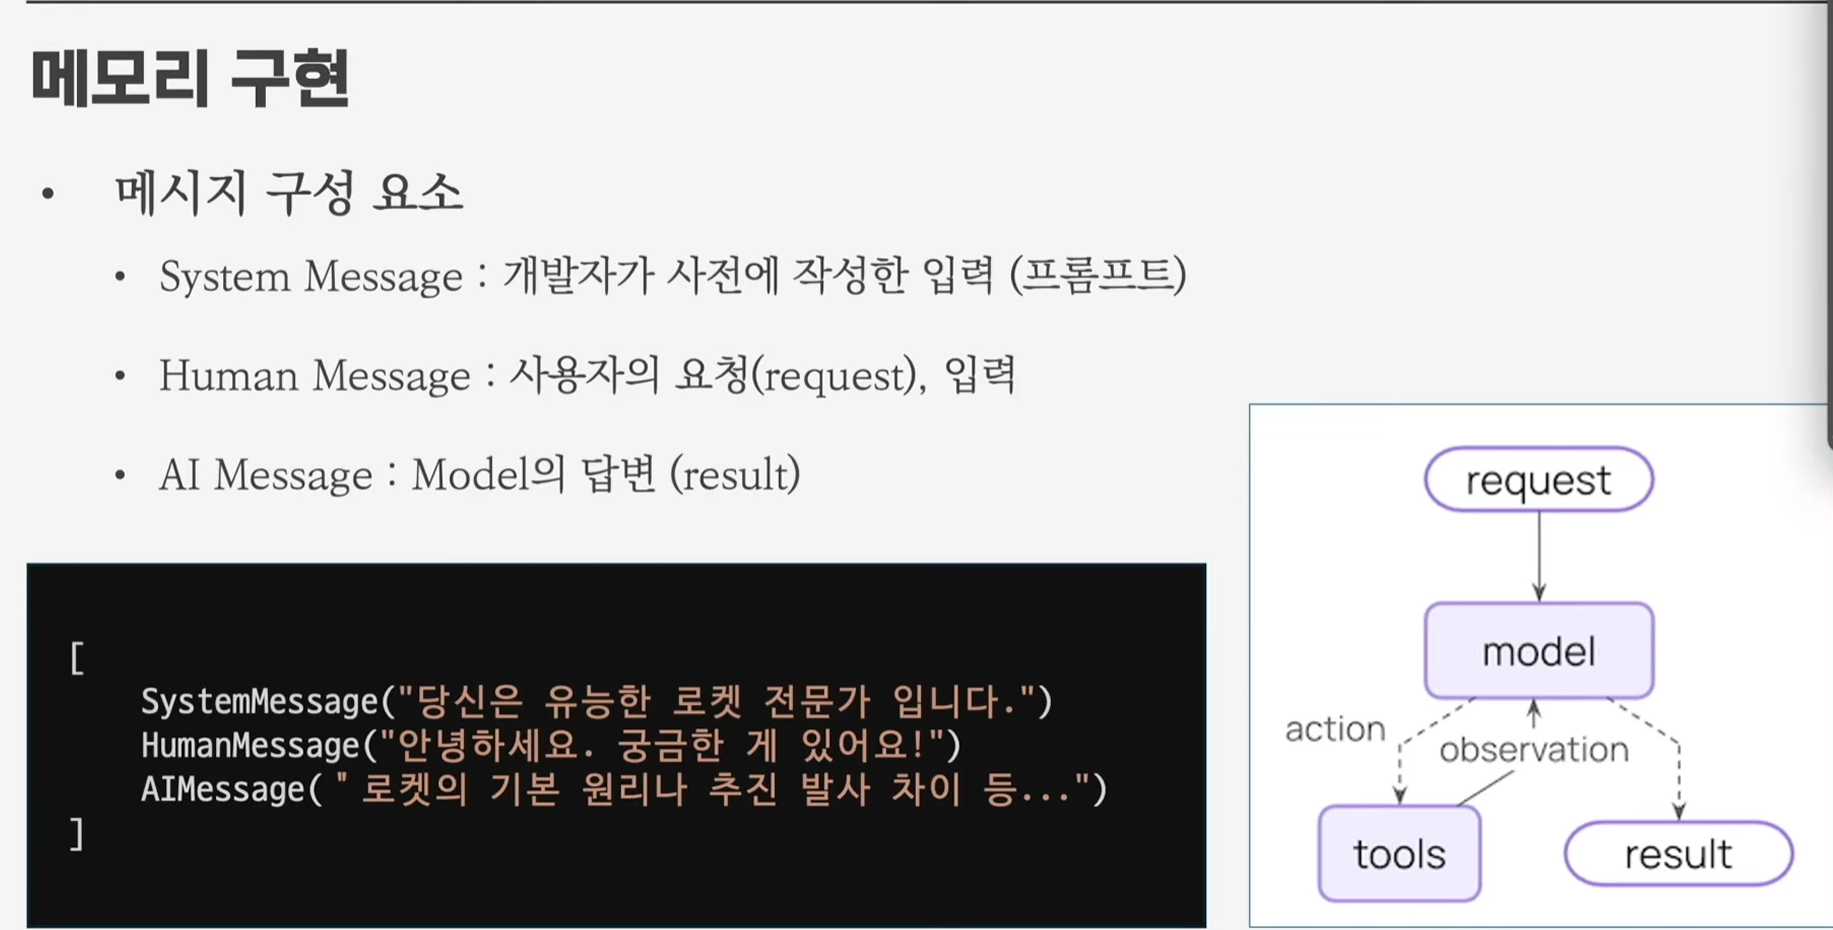

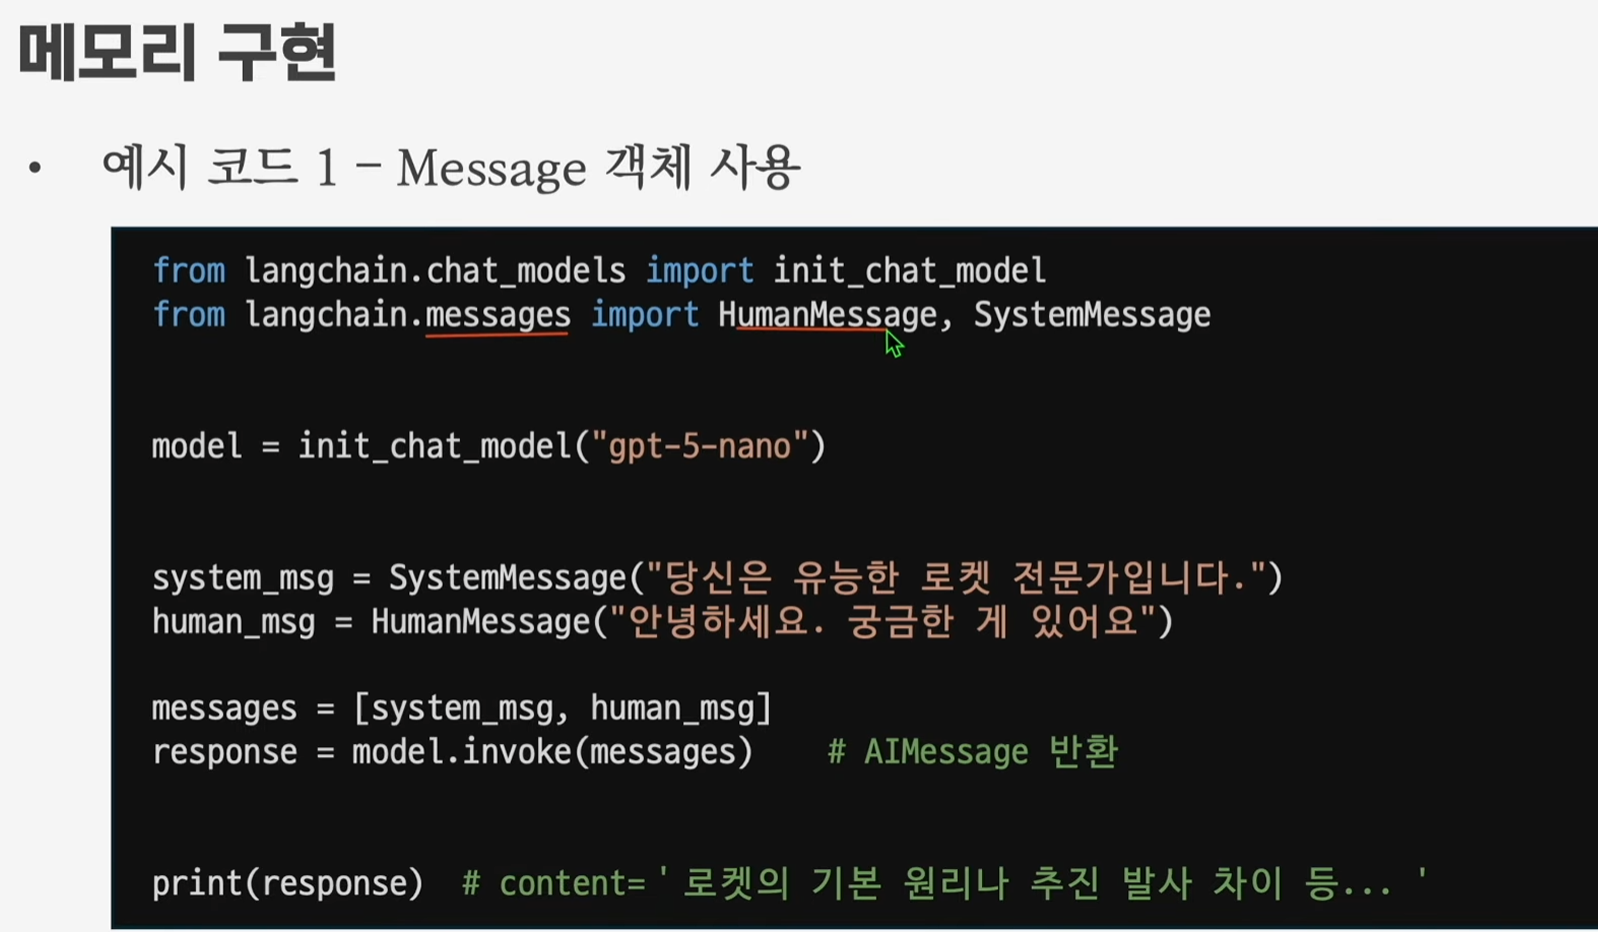

In [2]:
import os
from dotenv import load_dotenv
from openai import OpenAI
from langchain.chat_models import init_chat_model

load_dotenv()  # .env 파일에서 환경변수 로드
api_key = os.getenv("OPENAI_API_KEY")  # 없으면 None

if not api_key:
    raise ValueError("OPENAI_API_KEY가 없습니다. .env 또는 환경변수 설정 확인 필요")

model = init_chat_model("gpt-5-nano", api_key=api_key)


In [ ]:
# Memory 

# 방법1 Message 객체 사용

from langchain.messages import HumanMessage, SystemMessage, AIMessage

sys_msg = SystemMessage(content="당신은 유능한 로켓 전문가입니다.")
human_msg = HumanMessage(content="하이,궁금한게 있어.")

messages = [sys_msg, human_msg]
response = model.invoke(messages)
print(response.content)

안녕하세요! 어떤 점이 궁금하신가요? 로켓에 대해 다양한 주제를 함께 살펴볼 수 있어요. 예를 들면:

- 로켓 추진의 기본 원리 (액체 엔진 vs 고체 로켓, 산화제/연료의 역할)
- 다단계 로켓이 어떻게 작동하는지
- 발사에서 궤도 도달까지의 과정 (발사각, 속도, 궤도 삽입)
- 궤도역학의 기초 (궤도 모양, 전이 궤도 등)
- 로켓 엔진 설계의 주요 고려사항과 안전성
- 재사용 로켓 기술과 회수 방법
- 최신 이슈나 사례 (스페이스X 스타십, 아리안즈 6 등)

또는 특정 질문이 있다면 바로 알려주세요. 예를 들어 “왜 궤도 도달하려면 속도가 필요하고, 어떤 속도가 필요한가?” 같은 구체적인 질문도 좋습니다. 어떤 주제부터 시작할까요?


In [ ]:
hm1 = HumanMessage(content="로켓이 무엇인지 설명해줘.")
aim1 = AIMessage(content="로켓은 우주로 물체를 보내는 데 사용되는 추진 시스템입니다.")
hm2 = HumanMessage(content="로켓의 주요 구성 요소는 무엇인가?")

messages = [hm1, aim1, hm2]
response = model.invoke(messages)
print(response.content)

로켓의 주요 구성 요소를 간단히 정리하면 다음과 같습니다.

- 구조체/기본 프레임
  - 노즈 콘, 바디 튜브, 인터스테이지(단계 사이 구간), 페어링(페이로드를 둘러싸는 커버), 각 스테이지의 케이스 등 로켓의 뼈대와 외형을 이루는 부분.

- 추진 시스템
  - 엔진(주 엔진 포함), 연료 탱크와 산화제 탱크, 연료/산화제 배관과 밸브, 점화 및 제어 시스템, 노즐 및 트러스트 벡터링 장치.

- 다단 시스템 및 분리 장치
  - 다단 설계 자체와 각 단계의 분리 메커니즘(폭발 볼트, 스프링, 기계식/전기식 작동 등)과 인터스테이지.

- 제어/항법 시스템 (GN&C)
  - 탑재 컴퓨터, 관성측정장치(IMU), 자이로스코프, 가속도계, GPS/위성 항법, 센서 및 제어 서보/액추에이터.

- 제어면/안정화 수단
  - 비행 중 자세를 안정시키는 페어링과 핀(또는 가변 엔진 벡터링) 등 공기역학적 제어수단.

- 페이로드 시스템
  - 운반하는 위성이나 실험체 자체, 페이로드 어댑터, 페어링.

- 열 관리 및 단열
  - 열 차폐재, 단열재, 필요시 냉각/열 방출 시스템.

- 전력 및 데이터 시스템
  - avionics(항법/제어 전자), 데이터 로거, 텔레메트리 송수신 장치, 전력 공급(배터리 등).

- 지상 지원 및 발사 설비
  - 발사대, 점화 시스템 트리, 연료 주입 및 연결 점, 점검/시험 장비.

- 재사용 옵션(선택적)
  - 재사용 로켓의 경우 재사용 시스템(착륙 다리, 그리드 핀, 재진입 및 재활용 구성 요소).

참고로 로켓의 종류나 목적에 따라 위 구성의 구체적 형태와 수가 달라질 수 있습니다.


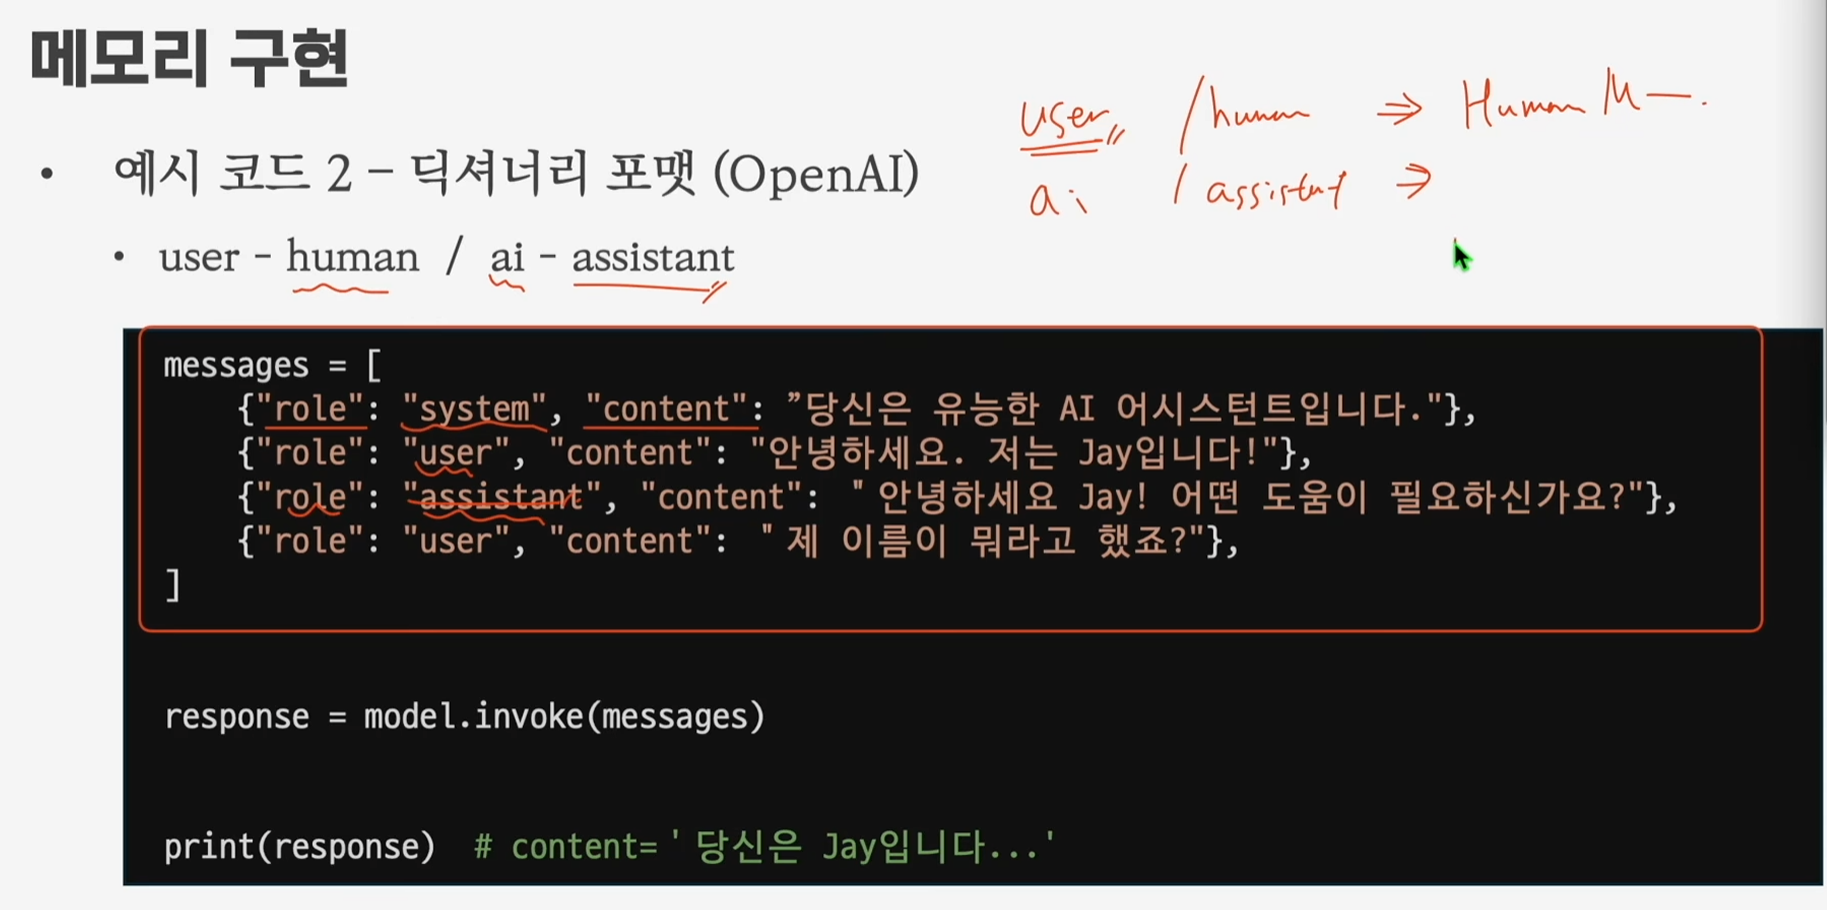

In [ ]:
# 방법 2 딕셔너리 포맷 (OpenAI 호환 포맷)

messages = [
    {"role": "system", "content": "당신은 유능한 로켓 전문가입니다."},
    {"role": "user", "content": "하이,궁금한게 있어."},
    {"role": "user", "content": "로켓이 무엇인지 설명해줘."},
    {"role": "assistant", "content": "로켓은 우주로 물체를 보내는 데 사용되는 추진 시스템입니다."},
    {"role": "user", "content": "로켓의 주요 구성 요소는 무엇인가?"},
]
response = model.invoke(messages)
print(response.content)

로켓의 주요 구성 요소를 일반적인 형태로 정리하면 다음과 같습니다.

- 선체/구조(프레임): 로켓의 뼈대와 외피로, 하중을 지탱하고 공기역학적 형태를 제공합니다. 경량 소재로 만들어져 강도와 강성, 열 보호를 모두 고려합니다.

- 추진계(연료-산화제 탱크 및 엔진): 
  - 액체 로켓의 경우: 연료 탱크와 산화제 탱크, 엔진(연소실+노즐), 펌프/밸브/점화 장치.
  - 고체 로켓의 경우: 고체 추진제 탱크(모터 케이싱)와 노즐, 모터 내부의 점화 메커니즘.
  추진제 저장, 공급, 연소를 담당합니다.

- 다단 시스템 및 분리 메커니즘: 다단 로켓인 경우 각 단의 분리 구조, 인터스테이지, 분리 핀/추진모터 등으로 단계적 분리를 수행합니다.

- 항법/제어 시스템(GNC): 비행컴퓨터, 관성 측정장치(IMU), 자이로스코프, GPS/위치 센서 등으로 비행 경로를 계산하고 제어합니다.

- 추진 제어 및 자세 제어 시스템: 
  - 스러스트 벡터링(노즐 방향 제어)이나 RCS/미세 추진체를 이용해 자세를 조정합니다.
  - 엔진 벨브, 점화 시스템, 제어 소자들이 포함됩니다.

- 페이로드 및 페어링: 임무 목표물인 위성, 과학 실험장치 등과 이를 보호하는 페어링(노즈 콘 포함)으로 구성됩니다.

- 통신/텔레메트리 시스템: 지상 관제와의 데이터 송수신(텔레메트리), 원격 명령 수신을 담당합니다.

- 열 관리/단열 및 열 차폐: 극한의 온도 변화에 대응하기 위한 단열재, 방열판, 열 차폐 체계가 포함됩니다.

- 안전/비상 시스템: 발사 중 이상 시 자동 차단, 비상 분리/차단 등 비상 절차를 수행하는 시스템.

참고로 추진 형태에 따라 세부 구성은 달라지지만, 위의 요소들이 로켓의 핵심 구성으로 대부분의 로켓에 공통적으로 포함됩니다. 필요하다면 액체 로켓과 고체 로켓의 차이점과 예시를 더 자세히 설명드릴게요.
